Import required libs

In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Load Stackoverflow data

In [12]:
survey_results = pd.read_csv('data/survey_results_public.csv')

List the columns


In [35]:
data = pd.read_csv('data/survey_results_public.csv')

for i in range(0, len(data.columns)):
    print(i, data.columns[i])


0 Respondent
1 MainBranch
2 Hobbyist
3 OpenSourcer
4 OpenSource
5 Employment
6 Country
7 Student
8 EdLevel
9 UndergradMajor
10 EduOther
11 OrgSize
12 DevType
13 YearsCode
14 Age1stCode
15 YearsCodePro
16 CareerSat
17 JobSat
18 MgrIdiot
19 MgrMoney
20 MgrWant
21 JobSeek
22 LastHireDate
23 LastInt
24 FizzBuzz
25 JobFactors
26 ResumeUpdate
27 CurrencySymbol
28 CurrencyDesc
29 CompTotal
30 CompFreq
31 ConvertedComp
32 WorkWeekHrs
33 WorkPlan
34 WorkChallenge
35 WorkRemote
36 WorkLoc
37 ImpSyn
38 CodeRev
39 CodeRevHrs
40 UnitTests
41 PurchaseHow
42 PurchaseWhat
43 LanguageWorkedWith
44 LanguageDesireNextYear
45 DatabaseWorkedWith
46 DatabaseDesireNextYear
47 PlatformWorkedWith
48 PlatformDesireNextYear
49 WebFrameWorkedWith
50 WebFrameDesireNextYear
51 MiscTechWorkedWith
52 MiscTechDesireNextYear
53 DevEnviron
54 OpSys
55 Containers
56 BlockchainOrg
57 BlockchainIs
58 BetterLife
59 ITperson
60 OffOn
61 SocialMedia
62 Extraversion
63 ScreenName
64 SOVisit1st
65 SOVisitFreq
66 SOVisitTo
67 SO

Next lets see gender representation


In [129]:
langs = ['Python','JavaScript','Java','C#','Scala','Swift','Objective-C','Go','Rust','C++']
language_users = []

def count_for_lang(dataFrame, lang):
    count = 0
    for ww in dataFrame.LanguageWorkedWith:
        # print(ww)
        if lang in str(ww):
            count += 1
    return count

def handle_pair(pair):
    (total, chunk) = pair
    return (chunk/total) * 100

def get_percs(totals, chunks):
    return list(map(handle_pair, zip(totals, chunks)))

for lang in langs:
   count = count_for_lang(data, lang)
   language_users.append(count)

language_users

[36443, 59219, 70113, 27097, 3309, 5744, 4191, 7201, 2794, 20524]

Lets count some gender representation

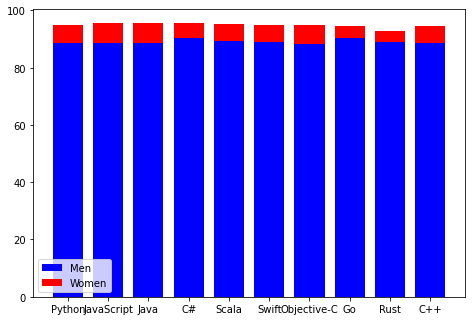

In [124]:
dt_women  = data[data.Gender == 'Woman']
dt_men  = data[data.Gender == 'Man']


men = []
women = []
all_genders = []


for lang in langs:
   wc = count_for_lang(dt_women, lang) 
   women.append(wc)
   mc = count_for_lang(dt_men, lang)
   men.append(mc)
  

men_perc = get_percs(language_users,men)
women_perc = get_percs(language_users,women)

#draw bar
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# ax.bar(langs, women)
# ax.bar(langs, men)
width = 0.75

# print(langs)
# print(women)
# print(men)

ax.bar(langs, men_perc, width, color='b')
ax.bar(langs, women_perc, width,bottom=men_perc, color='r')
ax.legend(labels=['Men', 'Women'])
plt.show()


Now lets look at ethnicity


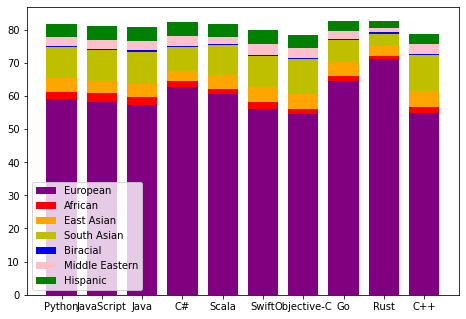

In [152]:
european = data[data.Ethnicity == 'White or of European descent']
african = data[data.Ethnicity == 'Black or of African descent'] 
east_asian = data[data.Ethnicity == 'East Asian']
south_asian = data[data.Ethnicity == 'South Asian']
biracial = data[data.Ethnicity == 'Biracial']
middle_eastern = data[data.Ethnicity == 'Middle Eastern'] 
hispanic = data[data.Ethnicity == 'Hispanic or Latino/Latina']

european_c = []
african_c = []
east_asian_c = []
south_asian_c = []
biracial_c = []
middle_eastern_c = []
hispanic_c = []

for lang in langs:
   european_c.append(count_for_lang(european, lang))
   african_c.append(count_for_lang(african, lang))
   east_asian_c.append(count_for_lang(east_asian, lang))
   south_asian_c.append(count_for_lang(south_asian, lang))
   biracial_c.append(count_for_lang(biracial, lang))
   middle_eastern_c.append(count_for_lang(middle_eastern, lang))
   hispanic_c.append(count_for_lang(hispanic, lang))



european_p = get_percs(language_users, european_c)
african_p = get_percs(language_users, african_c)
east_asian_p = get_percs(language_users, east_asian_c)
south_asian_p = get_percs(language_users, south_asian_c)
biracial_p = get_percs(language_users, biracial_c)
middle_eastern_p = get_percs(language_users, middle_eastern_c)
hispanic_p = get_percs(language_users, hispanic_c)

#draw bar
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.75

ax.bar(langs, european_p, width, color='purple') #euro
ax.bar(langs, african_p, width,bottom=european_p, color='r') #african
ax.bar(langs, east_asian_p, width,
    bottom=[european_p[j] + african_p[j] for j in range(len(european_p)) ], 
    color='orange') # east asian
ax.bar(langs, south_asian_p, width,
    bottom=[european_p[j] + african_p[j] + east_asian_p[j] for j in range(len(european_p)) ], 
    color='y') #south asian
ax.bar(langs, biracial_p, width,
    bottom=[european_p[j] + african_p[j] + east_asian_p[j] + south_asian_p[j] for j in range(len(european_p)) ], 
    color='b') #biracial
ax.bar(langs, middle_eastern_p, width,
    bottom=[european_p[j] + african_p[j] + east_asian_p[j] + south_asian_p[j] + biracial_p[j] for j in range(len(european_p)) ], 
    color='pink') #middle eastern
ax.bar(langs, hispanic_p, width,
    bottom=[european_p[j] + african_p[j] + east_asian_p[j] + south_asian_p[j] + biracial_p[j] + middle_eastern_p[j] for j in range(len(european_p)) ], 
    color='g') #hispanic
ax.legend(labels=['European', 'African','East Asian','South Asian','Biracial','Middle Eastern','Hispanic'])
plt.show()

